In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import utils as ut

In [2]:
ENERGY_PATH = '/net/pc200256/nobackup/users/most/output/LENTIS_2023_PD/agg_production/per_country/'
PATH_ED = '../../energydroughts-Europe/data/'
VARIABLE = 'residual'
RUNNAME = 'LENTIS_2023_PD'

ed = pd.read_csv(os.path.join(PATH_ED, 'netto_demand_el7_winter_LENTIS_2023_PD_1600_events.csv')).reset_index(drop=True)
ed['run'] = ed['runs'].str.extract('(\d+)').astype(int)
df_events = ed.drop(['Unnamed: 0', 'runs'], axis = 1)

In [3]:
data = ut.load_data(ENERGY_PATH, VARIABLE, RUNNAME, stacked = False)
COUNTRY_NR = data.country.values
COUNTRY_NAME = data.country_name.values
country_nr_name = dict(zip(COUNTRY_NR, COUNTRY_NAME))
country_name_nr  = dict(zip(COUNTRY_NAME, COUNTRY_NR))

Text(0, 0.5, 'Residual load [MWh]')

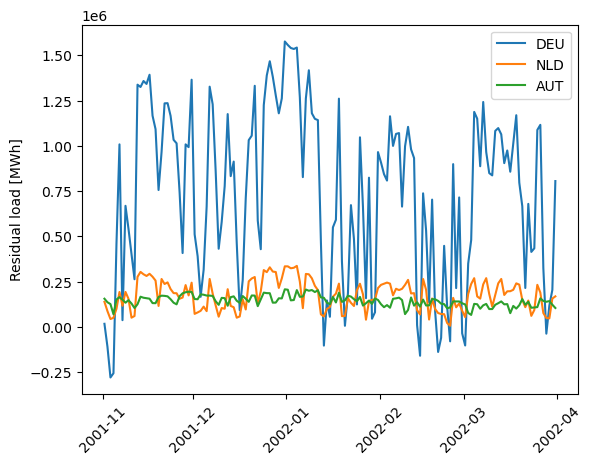

In [6]:
timeslice = pd.date_range('2001-11-01T12:00:00.000000000', '2002-03-31T12:00:00.000000000')
runname = 'h153'

data_DEU = data.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice)
data_NLD = data.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice)
data_AUT = data.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice)

plt.plot(data_DEU.time, data_DEU, label = "DEU")
plt.plot(data_NLD.time, data_NLD, label = "NLD")
plt.plot(data_AUT.time, data_AUT, label = "AUT")
plt.xticks(rotation = 45)
plt.legend()
plt.ylabel('Residual load [MWh]')

(0.0, 1.0)

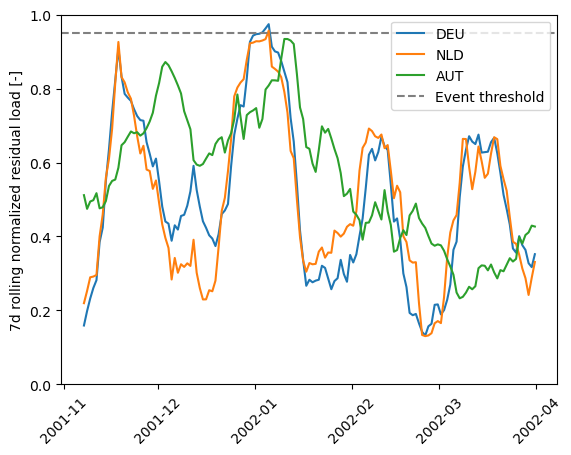

In [7]:
data_rank = data.rank(dim = 'time', pct = True)
data_rank_DEU = data_rank.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice)
data_rank_NLD = data_rank.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice)
data_rank_AUT = data_rank.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice)

plt.plot(data_rank_DEU.time, data_rank_DEU.rolling(time = 7, center = False).mean(), label = "DEU")
plt.plot(data_rank_NLD.time, data_rank_NLD.rolling(time = 7, center = False).mean(), label = "NLD")
plt.plot(data_rank_AUT.time, data_rank_AUT.rolling(time = 7, center = False).mean(), label = "AUT")
plt.axhline(0.95, color = 'grey', linestyle = '--', label = 'Event threshold')
plt.ylabel('7d rolling normalized residual load [-]')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)
plt.ylim(0, 1)

(0.0, 1.1)

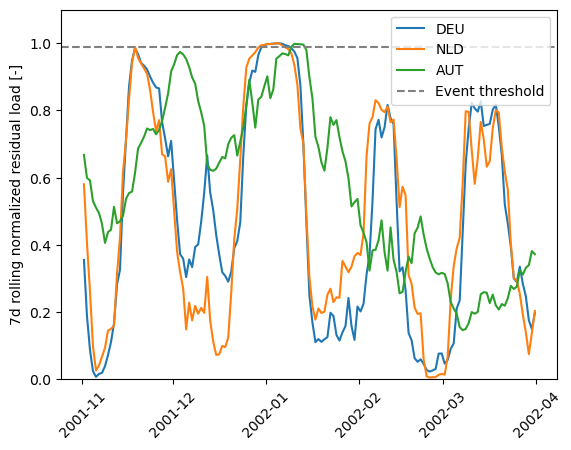

In [12]:
data_rank = data.rolling(time = 7, center = False).mean().rank(dim = 'time', pct = True)
data_rank_DEU = data_rank.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice)
data_rank_NLD = data_rank.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice)
data_rank_AUT = data_rank.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice)

plt.plot(data_rank_DEU.time, data_rank_DEU, label = "DEU")
plt.plot(data_rank_NLD.time, data_rank_NLD, label = "NLD")
plt.plot(data_rank_AUT.time, data_rank_AUT, label = "AUT")
plt.axhline(0.99, color = 'grey', linestyle = '--', label = 'Event threshold')
plt.ylabel('7d rolling normalized residual load [-]')
plt.legend(loc = 'upper right')
plt.xticks(rotation = 45)
plt.ylim(0, 1.1)

In [11]:
data_rank_NLD.max()

<xarray.DataArray 'residual' ()>
array(1.)
Coordinates:
    runs          <U4 'h153'
    country       float64 29.0
    country_name  <U3 'NLD'

### Appendix

Text(0, 0.5, 'Energy Demand [MWh]')

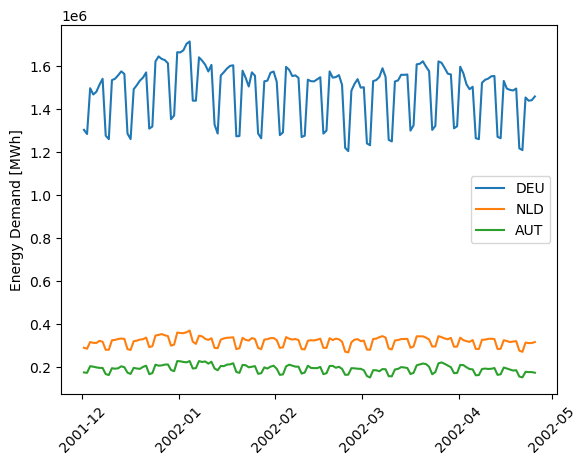

In [25]:
timeslice_year = pd.date_range('2001-12-01T12:00:00.000000000', '2002-04-25T12:00:00.000000000')

demanddata = ut.load_data(ENERGY_PATH, 'demand', RUNNAME, stacked = False)

data_DEU = demanddata.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice_year)
data_NLD = demanddata.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice_year)
data_AUT = demanddata.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice_year)

plt.plot(data_DEU.time, data_DEU, label = "DEU")
plt.plot(data_NLD.time, data_NLD, label = "NLD")
plt.plot(data_AUT.time, data_AUT, label = "AUT")
plt.xticks(rotation = 45)
plt.legend()
plt.ylabel('Energy Demand [MWh]')

Text(0, 0.5, 'Wind energy production [MWh]')

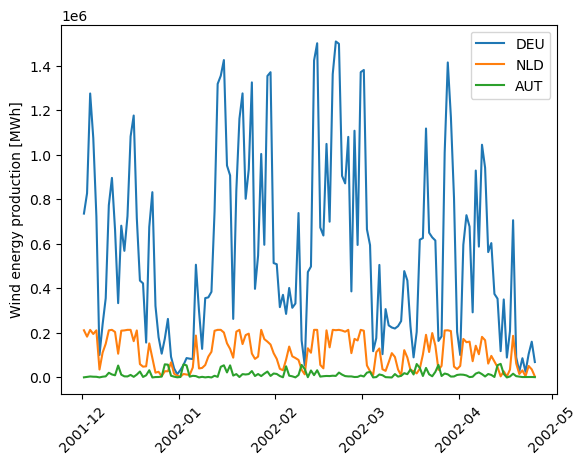

In [26]:
winddata = ut.load_data(ENERGY_PATH, 'wind', RUNNAME, stacked = False)

data_DEU = winddata.sel(country = country_name_nr['DEU'], runs = runname, time = timeslice_year)
data_NLD = winddata.sel(country = country_name_nr['NLD'], runs = runname, time = timeslice_year)
data_AUT = winddata.sel(country = country_name_nr['AUT'], runs = runname, time = timeslice_year)

plt.plot(data_DEU.time, data_DEU, label = "DEU")
plt.plot(data_NLD.time, data_NLD, label = "NLD")
plt.plot(data_AUT.time, data_AUT, label = "AUT")
plt.xticks(rotation = 45)
plt.legend()
plt.ylabel('Wind energy production [MWh]')